<a href="https://colab.research.google.com/github/Evgen0123456789/R_tasks/blob/main/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import os
os.path.realpath("__file__")

'/content/__file__'

In [130]:
with open("./sample_data/README.md") as f:
  print("\n".join(f.readlines()))

This directory includes a few sample datasets to get you started.



*   `california_housing_data*.csv` is California housing data from the 1990 US

    Census; more information is available at:

    https://developers.google.com/machine-learning/crash-course/california-housing-data-description



*   `mnist_*.csv` is a small sample of the

    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is

    described at: http://yann.lecun.com/exdb/mnist/



*   `anscombe.json` contains a copy of

    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it

    was originally described in



    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American

    Statistician. 27 (1): 17-21. JSTOR 2682899.



    and our copy was prepared by the

    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).



In [131]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [132]:
data = pd.read_csv("./sample_data/california_housing_train.csv")

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [134]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


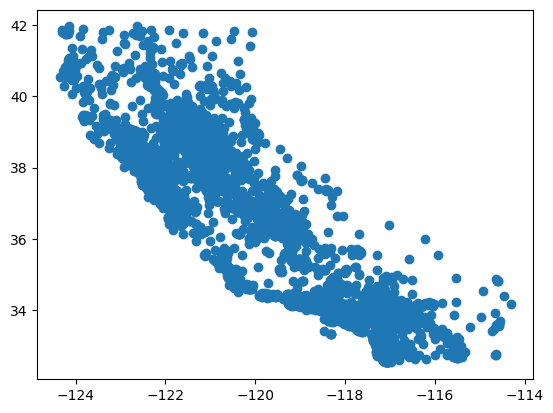

In [135]:
x, y =data["longitude"], data["latitude"]
plt.scatter(x,y)

In [136]:
info = data[data.columns[2:]]

In [137]:
info = (info-info.mean())/info.std()

In [138]:
info

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506,-1.210522
1,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451,-1.096713
2,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071,-1.048430
3,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590,-1.154480
4,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424,-1.222593
...,...,...,...,...,...,...,...
16995,1.859916,-0.195722,-0.344985,-0.455262,-0.343862,-0.799975,-0.826848
16996,0.588757,-0.135170,-0.027072,-0.205230,-0.094200,-0.715705,-1.106197
16997,-0.920744,0.015292,-0.019955,-0.161670,-0.117606,-0.446650,-0.894099
16998,-0.761850,0.012998,0.029868,-0.114626,-0.060392,-0.997758,-1.047568


In [139]:
k = 3

In [140]:
claster_kernels = np.zeros((k, len(info.columns)))

In [141]:
for i in range(k):
  claster_kernels[i] = info.sample(1000).mean()

In [142]:
clasters = np.zeros(len(data))
for epoch in range(100):
  for i in range(len(data)):
    d = ((claster_kernels - info.iloc[i].to_numpy())**2).sum(axis = 1)
    clasters[i] = np.where(d==d.min())[0]
  for i in range(k):
    claster_kernels[i] = info[clasters==i].mean()
    if len(info[clasters==i])==0:
      claster_kernels[i] = np.zeros(len(info.columns))

In [143]:
for i in range(len(data)):
    d = ((claster_kernels - info.iloc[i].to_numpy())**2).sum(axis = 0)
    clasters[i] = np.where(d==d.min())[0]

In [144]:
np.unique(clasters)

array([0., 1., 2., 3., 4., 5., 6.])

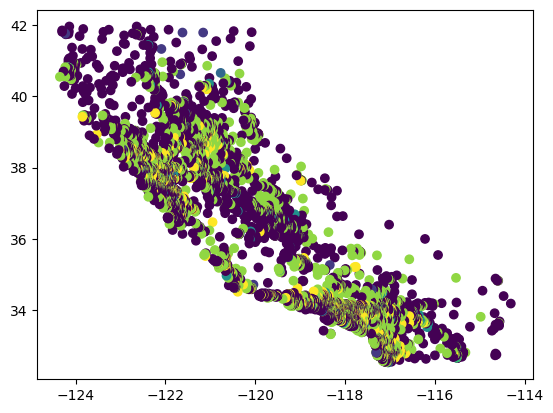

In [145]:
plt.scatter(x, y, c = clasters)

In [146]:
info["claster"] = clasters

In [147]:
info.groupby(["claster"]).mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
claster,,,,,,,
0.0,-0.197414,-0.014767,0.014262,0.030468,0.013008,-0.066297,-0.074112
1.0,0.843466,0.051161,-0.183157,-0.238889,-0.182544,2.086644,1.700824
2.0,0.550622,0.495891,0.398931,0.270475,0.325231,0.010556,0.275411
3.0,0.510554,-0.075885,0.068713,0.221831,0.044000,-0.696101,-0.644468
4.0,-0.049765,0.355276,0.489250,0.451294,0.486224,-0.511159,-0.327160
5.0,0.115932,0.019083,-0.027074,-0.055546,-0.026025,0.073136,0.036671
6.0,0.248077,0.001531,0.017129,0.014544,0.024283,-0.044277,0.114156


In [148]:
from sklearn.decomposition import PCA

In [149]:
info_transformed = PCA(n_components=2).fit_transform(info)

In [150]:
info_transformed

array([[ 2.74524251,  1.3264823 ],
       [ 2.74557885,  2.48841798],
       [ 2.6468197 , -1.82692538],
       ...,
       [ 2.68181247, -0.11582775],
       [ 2.68334239, -0.11028218],
       [-2.53978318, -1.37117491]])

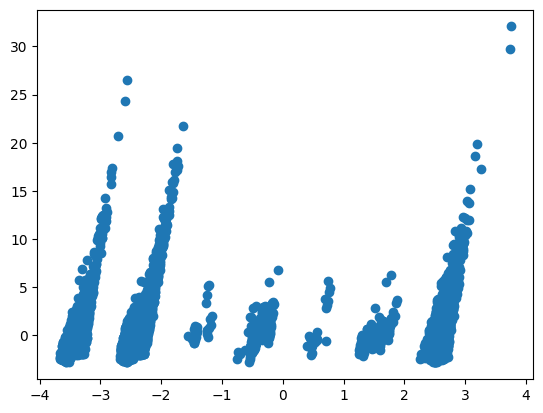

In [151]:
plt.scatter(*info_transformed.T)

In [152]:
from sklearn.cluster import DBSCAN

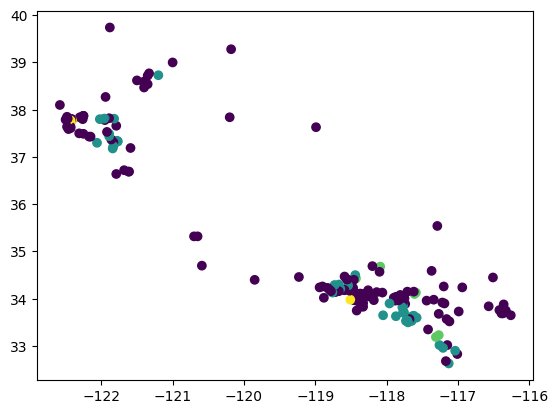

In [153]:
c = DBSCAN(eps = 1.5).fit_predict(info)
plt.scatter(x[c!=0], y[c!=0], c=c[c!=0])

In [154]:
info["claster"] = c
info.groupby("claster").mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
claster,,,,,,,
-1,-0.668173,4.383271,4.588291,4.156983,4.264005,0.590663,0.588985
0,0.009306,-0.040686,-0.040630,-0.037161,-0.038052,-0.010199,-0.009416
1,-1.623549,1.226966,0.446208,0.645343,0.470605,2.462117,1.899464
2,-1.688736,8.387666,8.310226,7.292536,8.268589,0.078071,-0.271598
3,1.621574,-0.331620,0.293806,-0.255759,0.144408,-1.029673,1.742262


In [171]:
class NN(torch.nn.Module):
  def __init__(self):
    super(NN, self).__init__()

    self.layer_1 = torch.nn.Linear(len(data.columns), 10, dtype=torch.float64)
    self.layer_2 = torch.nn.Linear(10, 5, dtype=torch.float64)

    self.layer_3 = torch.nn.Linear(5, 10, dtype=torch.float64)
    self.layer_4 = torch.nn.Linear(10, len(data.columns), dtype=torch.float64)

  def forward(self, x):
    hid = torch.nn.functional.relu(self.layer_1(torch.tensor(x)))
    hid = torch.nn.functional.relu(self.layer_2(hid))
    out = torch.nn.functional.relu(self.layer_3(hid))
    out = torch.nn.functional.relu(self.layer_4(out))
    return hid, out

In [172]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)
model = NN().to(DEVICE)

cpu


In [157]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [159]:
criterion = torch.nn.L1Loss()

In [160]:
torch.tensor(data.values)

tensor([[-1.1431e+02,  3.4190e+01,  1.5000e+01,  ...,  4.7200e+02,
          1.4936e+00,  6.6900e+04],
        [-1.1447e+02,  3.4400e+01,  1.9000e+01,  ...,  4.6300e+02,
          1.8200e+00,  8.0100e+04],
        [-1.1456e+02,  3.3690e+01,  1.7000e+01,  ...,  1.1700e+02,
          1.6509e+00,  8.5700e+04],
        ...,
        [-1.2430e+02,  4.1840e+01,  1.7000e+01,  ...,  4.5600e+02,
          3.0313e+00,  1.0360e+05],
        [-1.2430e+02,  4.1800e+01,  1.9000e+01,  ...,  4.7800e+02,
          1.9797e+00,  8.5800e+04],
        [-1.2435e+02,  4.0540e+01,  5.2000e+01,  ...,  2.7000e+02,
          3.0147e+00,  9.4600e+04]], dtype=torch.float64)

In [173]:
model

NN(
  (layer_1): Linear(in_features=9, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=9, bias=True)
)

In [174]:
E = data.mean()
S = data.std()

for epoch in range(10000):
  optimizer.zero_grad()
  hiden, output = model(((data-E)/S).values)
  loss = criterion(output, torch.tensor(((data-data.mean())/data.std()).values))
  if epoch%1000 == 0:
    print("Epoch: {0}; loss: {1}".format(epoch, loss))

  loss.backward()
  optimizer.step()

Epoch: 0; loss: 0.7581858964457945
Epoch: 1000; loss: 0.7581858964457945
Epoch: 2000; loss: 0.7581858964457945
Epoch: 3000; loss: 0.7581858964457945
Epoch: 4000; loss: 0.7581858964457945
Epoch: 5000; loss: 0.7581858964457945
Epoch: 6000; loss: 0.7581858964457945
Epoch: 7000; loss: 0.7581858964457945
Epoch: 8000; loss: 0.7581858964457945
Epoch: 9000; loss: 0.7581858964457945


In [175]:
sample = data.sample(10)

In [176]:
torch.tensor(((sample-E)/S).values, dtype=torch.float64)

tensor([[ 1.2678, -1.2517, -0.2852, -0.3370, -0.4873, -0.3368, -0.4661, -0.0551,
         -0.4070],
        [ 0.6793, -0.6621,  0.9065, -0.5352, -0.7388, -0.7149, -0.7210,  2.0721,
          2.5236],
        [-1.3405,  1.0362,  1.8599, -0.0498, -0.1196, -0.2923,  0.0332, -0.1176,
          0.7923],
        [-0.8966,  1.1158, -1.0002, -0.7173, -0.8859, -0.8037, -0.8302,  0.3376,
         -0.3483],
        [ 0.6095, -0.7510,  1.2243, -0.2645, -0.3663, -0.3342, -0.1566, -0.1823,
         -0.4346],
        [ 0.5895, -0.8493, -0.6824, -0.3067, -0.5538, -0.6330, -0.5441,  2.4450,
          1.7502],
        [ 0.6643, -0.7276,  0.9065, -0.9806, -0.9974, -0.8996, -1.0070, -0.3612,
         -0.5475],
        [-1.1310,  0.7789, -1.4769, -0.3742, -0.2050, -0.0641, -0.2398,  0.3725,
         -0.7225],
        [ 0.6244, -0.7510,  1.1449, -0.1783, -0.0152,  0.1206, -0.0812, -1.1467,
         -0.7941],
        [ 1.2229, -1.3686,  0.4299, -0.2824, -0.0413,  0.3201, -0.0968, -1.1233,
         -1.1027]],

In [177]:
model.forward(torch.tensor(((sample-E)/S).values, dtype=torch.float64))[1]

<ipython-input-171-87a9b15d41b1>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid = torch.nn.functional.relu(self.layer_1(torch.tensor(x)))


tensor([[0.0000, 0.0000, 0.0000, 0.0344, 0.0000, 0.0000, 0.1938, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0305, 0.0000, 0.0000, 0.1880, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0311, 0.0000, 0.0000, 0.1861, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0386, 0.0000, 0.0000, 0.1911, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0304, 0.0000, 0.0000, 0.1870, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0317, 0.0000, 0.0000, 0.1853, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0349, 0.0000, 0.0000, 0.1916, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0352, 0.0000, 0.0000, 0.1903, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0324, 0.0000, 0.0000, 0.1885, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0356, 0.0000, 0.0000, 0.1921, 0.0000, 0.0000]],
       dtype=torch.float64, grad_fn=<ReluBackward0>)

In [179]:
(model.forward(torch.tensor(((sample-E)/S).values))[1] - torch.tensor(((sample-E)/S).values)).mean()

<ipython-input-171-87a9b15d41b1>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid = torch.nn.functional.relu(self.layer_1(torch.tensor(x)))


tensor(0.1508, dtype=torch.float64, grad_fn=<MeanBackward0>)